# UnSupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [321]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [322]:
# Load dataset from CSV file
df_wholesale_data = pd.read_csv("Wholesale_Data.csv")

# Display basic information
print(df_wholesale_data.info())
print(df_wholesale_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

In [323]:
# Summary statistics: mean, median, standard deviation
summary_stats = df_wholesale_data.describe().T  # Transpose for better readability
summary_stats["median"] = df_wholesale_data.median()

print(summary_stats)

                  count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  median  
Channel               2.00       2.0     1.0  
Region                3.00       3.0     3.0  
Fresh             16933.75  112151.0  8504.0  
Milk               7190.25   73498.0  3627.0  
Grocery           10655.75   92780.0  4755.5  
Frozen         

In [324]:
# Check for missing values
print("Missing values:\n", df_wholesale_data.isnull().sum())

# Handle missing values (if any)
df_wholesale_data.fillna(df_wholesale_data.mean(), inplace=True)  # Using mean imputation

# Check for duplicate rows
print("Duplicate rows:", df_wholesale_data.duplicated().sum())
df_wholesale_data.drop_duplicates(inplace=True)  # Remove duplicates

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Duplicate rows: 0


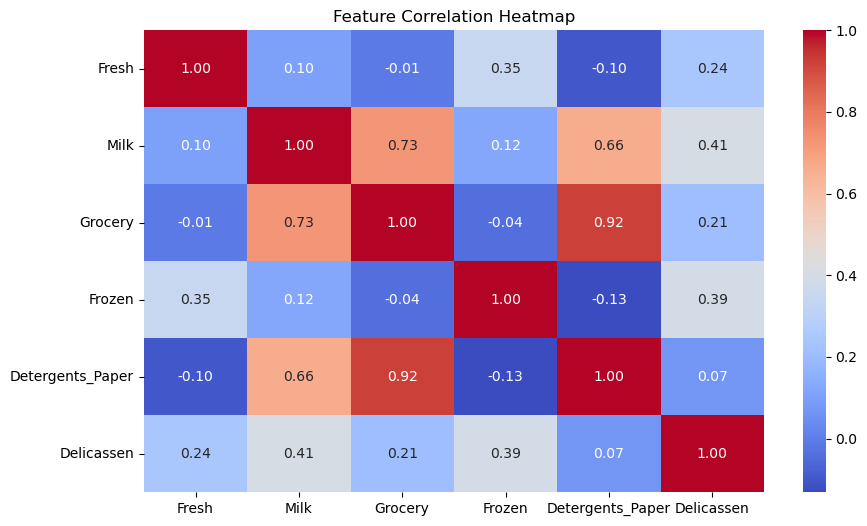

In [325]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df_wholesale_data.iloc[:, 2:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


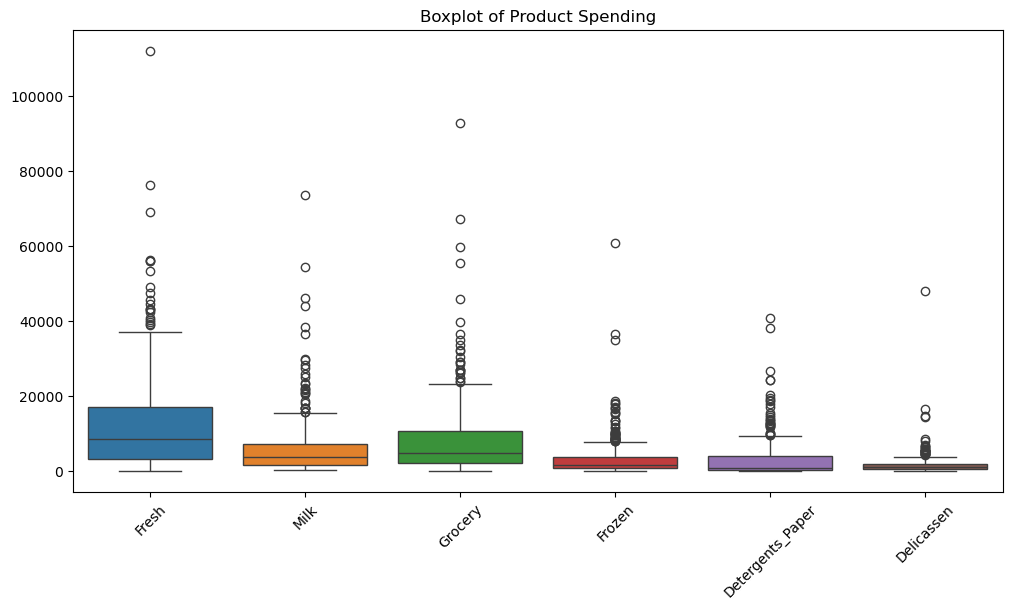

In [326]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_wholesale_data.iloc[:, 2:])  # Exclude non-numeric columns
plt.xticks(rotation=45)
plt.title("Boxplot of Product Spending")
plt.show()


In [328]:
# Group by Channel & Region, then calculate mean spending per category
channel_region_summary = df_wholesale_data.groupby(["Channel", "Region"]).mean()

print(channel_region_summary)


                       Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524  


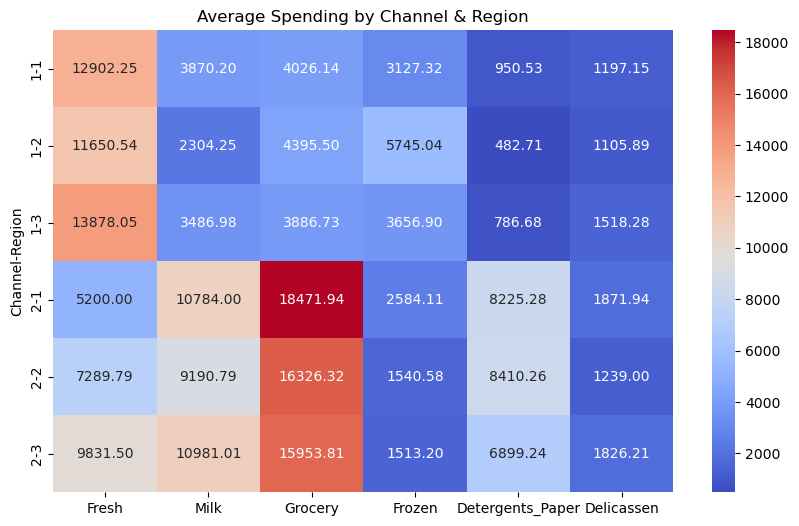

In [329]:
plt.figure(figsize=(10, 6))
sns.heatmap(channel_region_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Spending by Channel & Region")
plt.show()

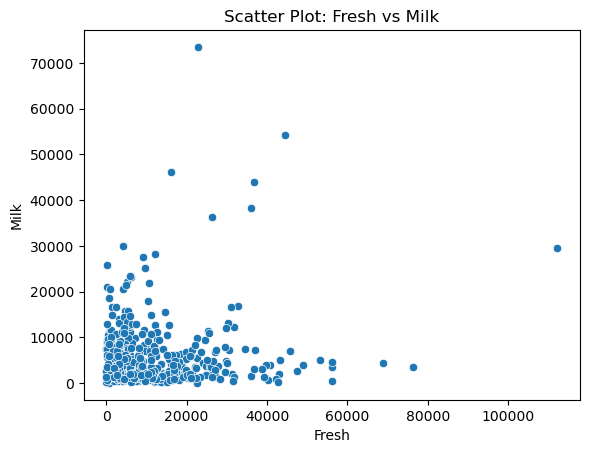

In [330]:
sns.scatterplot(x=df["Fresh"], y=df["Milk"])
plt.title("Scatter Plot: Fresh vs Milk")
plt.show()

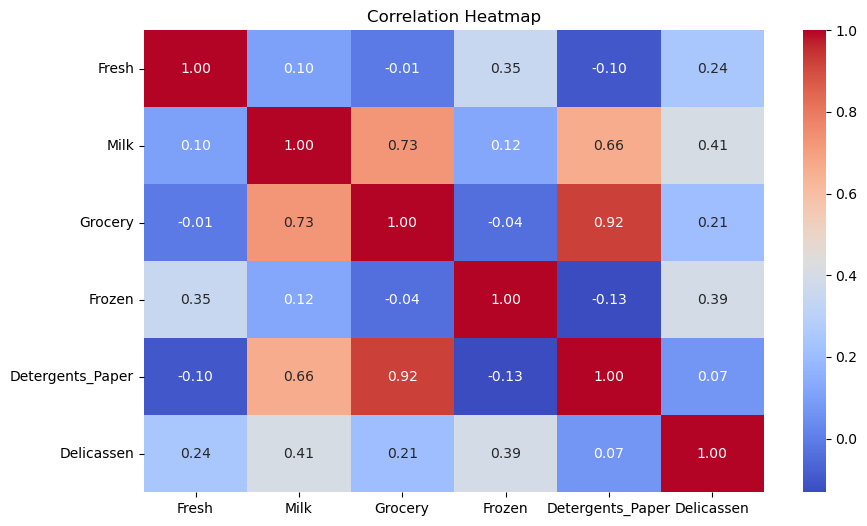

In [331]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_wholesale_data.iloc[:, 2:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Reveals strong relationship between Grocery & Detergents_paper

In [332]:
from scipy.stats import zscore

# Compute Z-scores and detect outliers
z_scores = np.abs(zscore(df_wholesale_data.iloc[:, 2:]))
outliers = (z_scores > 3).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

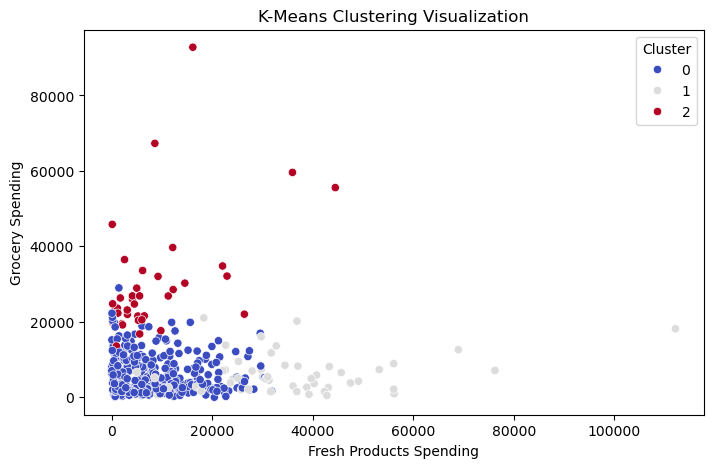

Cluster Centers:
 [[-0.24260351 -0.21266148 -0.22157224 -0.18656872 -0.20323381 -0.15007652]
 [ 1.78420858  0.00869407 -0.19264494  1.39607954 -0.39896023  0.75947859]
 [-0.26086015  1.99920893  2.37190452 -0.23495033  2.49396554  0.33174095]]


In [333]:
# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_wholesale_data.iloc[:, 2:])

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df_wholesale_data.columns[2:])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_wholesale_data["Cluster"] = kmeans.fit_predict(df_scaled)  # Assign clusters to original DataFrame

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_wholesale_data["Fresh"], y=df_wholesale_data["Grocery"], hue=df_wholesale_data["Cluster"], palette="coolwarm")
plt.title("K-Means Clustering Visualization")
plt.xlabel("Fresh Products Spending")
plt.ylabel("Grocery Spending")
plt.show()

# Check cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

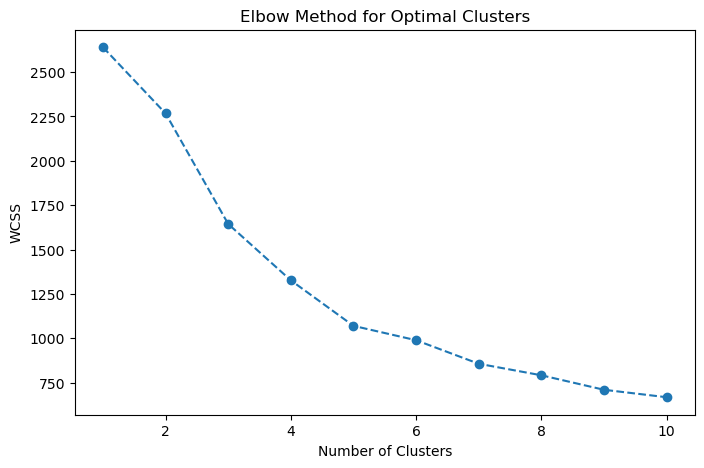

In [334]:
# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

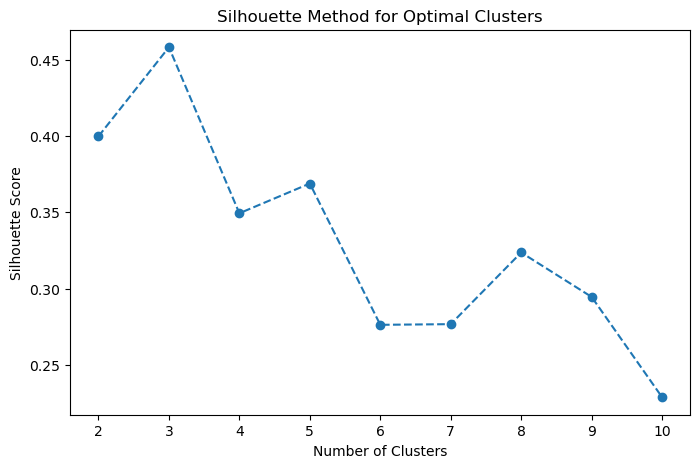

In [335]:
# Determine optimal number of clusters using Silhouette Score
silhouette_scores = []
range_n_clusters = range(2, 11)  # Testing between 2 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal Clusters")
plt.show()

K=3 is the ideal choice because it has the highest silhouette score, suggesting well-defined, distinct clusters.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

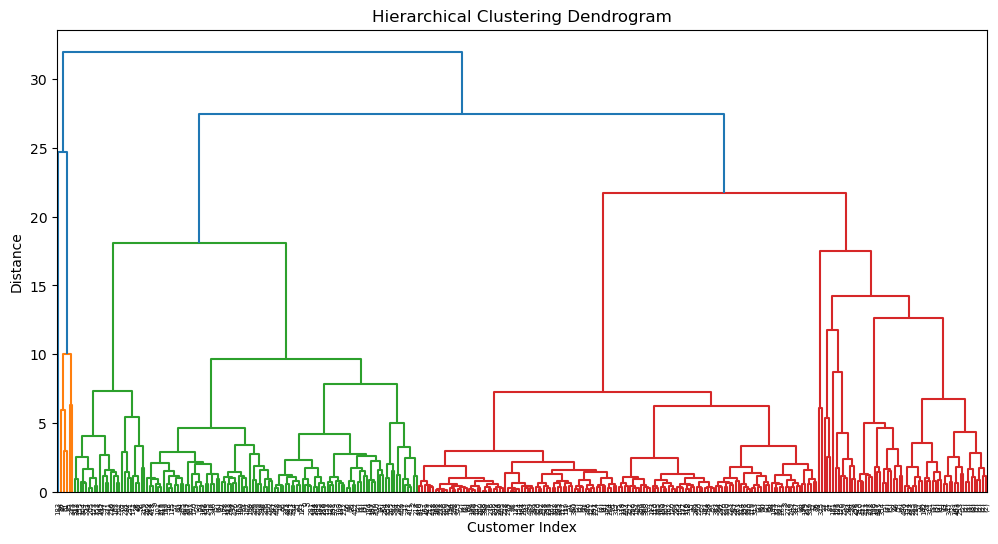

Cluster_Hierarchical
3    281
2    153
1      6
Name: count, dtype: int64


/var/folders/vh/hr9w_0vd1xv4xfslxfhrwmxh0000gn/T/ipykernel_5302/4150315657.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_wholesale_data["Cluster_Hierarchical"], palette="coolwarm")


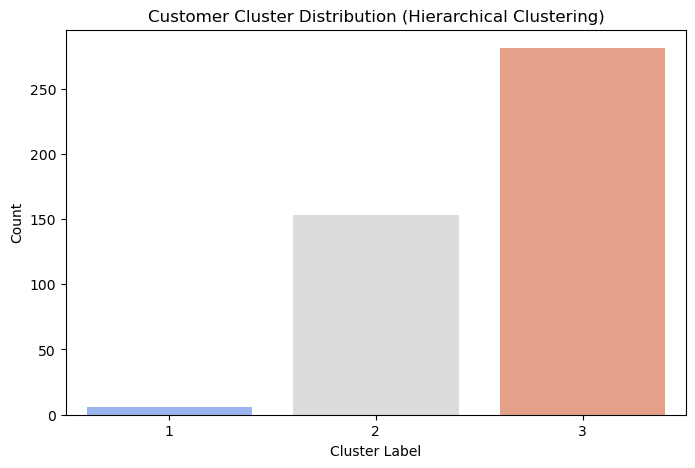

In [336]:
# Apply Hierarchical Clustering using Ward’s method
linkage_matrix = linkage(df_scaled, method="ward")

# Plot Dendrogram to determine optimal clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=10)  # Truncate for better readability
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Define clusters based on dendrogram observations
num_clusters = 3  # Change based on dendrogram cut-off
df_wholesale_data["Cluster_Hierarchical"] = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

# Display cluster distribution
print(df_wholesale_data["Cluster_Hierarchical"].value_counts())

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_wholesale_data["Cluster_Hierarchical"], palette="coolwarm")
plt.title("Customer Cluster Distribution (Hierarchical Clustering)")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()



# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

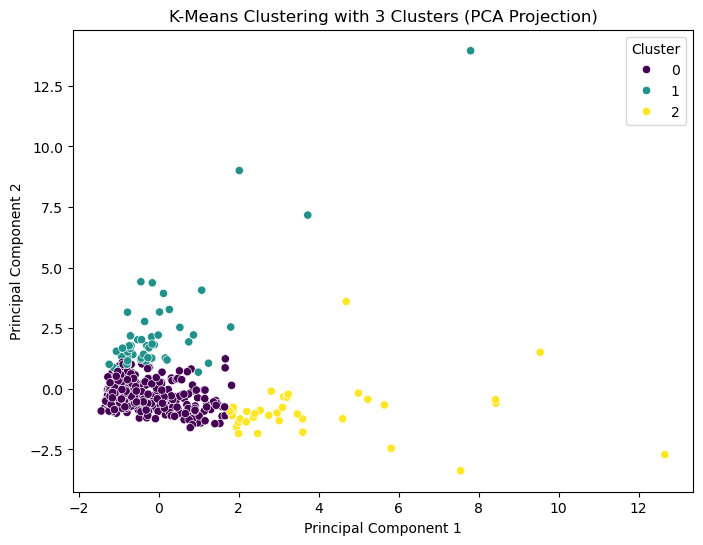

Optimal number of clusters: 3


In [337]:
# Apply K-Means with optimal clusters
optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because indexing starts at 0
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_wholesale_data["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot K-Means clustering results with PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_wholesale_data["Cluster"], palette="viridis")
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Print optimal cluster count
print(f"Optimal number of clusters: {optimal_clusters}")

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Here are four key findings from the unsupervised learning model and exploratory data analysis (EDA) on the Wholesale Customers dataset:

Customer Segmentation Reveals Spending Patterns: Using K-Means and Hierarchical Clustering, customers were grouped into distinct segments—low spenders, mid-range buyers, and bulk purchasers—helping wholesalers tailor marketing strategies.

High Correlation Between Grocery & Detergents_Paper: The correlation analysis revealed a strong positive relationship between Grocery and Detergents_Paper, suggesting that customers who spend more on groceries tend to also purchase cleaning products in larger quantities.

Outlier Detection Identifies Unusual Buying Behavior: Some customers exhibited significantly high spending in specific categories (e.g., Fresh and Frozen goods), which could indicate specialized buyers or bulk food suppliers.

Principal Component Analysis (PCA) Revealed Key Features: Grocery spending dominates, suggesting it may be the best predictor of customer segmentation.
Frozen & Fresh products hold moderate importance, potentially indicating specialized spending behaviors.
Milk has minimal impact, meaning it likely does not strongly differentiate customers.


Hierarchical Clustering Dendrogram Shows No Clear Cut-off: The dendrogram analysis suggested that while clusters exist, there’s no obvious natural division, indicating that customer behavior may follow a more continuous distribution rather than distinct categories.